In [43]:
import os
import PyPDF2
import tqdm

def extract_sentences_from_pdfs(folder_path):

    sentences_by_pdf = {}

    for filename in os.listdir(folder_path):

        if filename.endswith(".pdf"):

            pdf_path = os.path.join(folder_path, filename)

            try:

                with open(pdf_path, 'rb') as file:

                    reader = PyPDF2.PdfReader(file)
                    text = ''

                    for page_num in range(len(reader.pages)):
                        page = reader.pages[page_num]
                        text += page.extract_text()

                    sentences = text.split('.')  

                    if len(sentences) >= 700: 

                        sentences_by_pdf[filename] = sentences


            except Exception as e:

                print(f"Error reading {filename}: {e}")

    return sentences_by_pdf

pdf_folder_path = 'pdfs2'
sentences_by_pdf = extract_sentences_from_pdfs(pdf_folder_path)

Error reading 10.pdf: EOF marker not found
Error reading 1002.pdf: EOF marker not found
Error reading 1003.pdf: EOF marker not found
Error reading 1007.pdf: EOF marker not found
Error reading 102.pdf: EOF marker not found
Error reading 1020.pdf: EOF marker not found
Error reading 1043.pdf: EOF marker not found
Error reading 1046.pdf: EOF marker not found
Error reading 1047.pdf: EOF marker not found
Error reading 1049.pdf: EOF marker not found
Error reading 124.pdf: EOF marker not found
Error reading 125.pdf: EOF marker not found
Error reading 131.pdf: EOF marker not found
Error reading 134.pdf: EOF marker not found
Error reading 136.pdf: EOF marker not found
Error reading 142.pdf: EOF marker not found
Error reading 145.pdf: EOF marker not found
Error reading 148.pdf: EOF marker not found
Error reading 150.pdf: Cannot read an empty file
Error reading 153.pdf: EOF marker not found
Error reading 156.pdf: EOF marker not found
Error reading 170.pdf: EOF marker not found
Error reading 172.pd

In [54]:
from nltk.sentiment import SentimentIntensityAnalyzer

def analyze_sentiments(sentences_by_pdf):

    sia = SentimentIntensityAnalyzer()
    sentiments_by_pdf = {}

    for pdf, sentences in sentences_by_pdf.items():

        sentiments = []
        
        for sentence in sentences:

            score = sia.polarity_scores(sentence)
            sentiments.append((sentence, score))

        sentiments_by_pdf[pdf] = sentiments

    return sentiments_by_pdf

sentiments_by_pdf = analyze_sentiments(sentences_by_pdf)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sabri\AppData\Roaming\nltk_data...


True

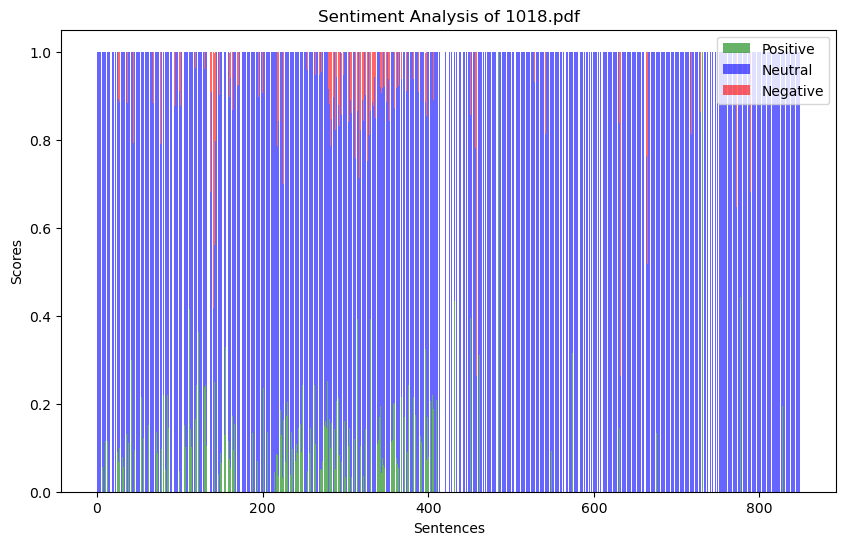

In [60]:
import matplotlib.pyplot as plt

def plot_sentiment_analysis(sentiments_by_pdf, pdf_name):

    if pdf_name not in sentiments_by_pdf:

        print(f"No sentiment data found for {pdf_name}")

        return

    sentiments = sentiments_by_pdf[pdf_name]
    positive_scores = [s[1]['pos'] for s in sentiments]
    neutral_scores = [s[1]['neu'] for s in sentiments]
    negative_scores = [s[1]['neg'] for s in sentiments]

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(positive_scores)), positive_scores, color='green', alpha=0.6, label='Positive')
    plt.bar(range(len(neutral_scores)), neutral_scores, color='blue', alpha=0.6, bottom=positive_scores, label='Neutral')
    plt.bar(range(len(negative_scores)), negative_scores, color='red', alpha=0.6, bottom=[p+n for p,n in zip(positive_scores, neutral_scores)], label='Negative')

    plt.xlabel('Sentences')
    plt.ylabel('Scores')
    plt.title(f'Sentiment Analysis of {pdf_name}')
    plt.legend(loc='upper right')
    plt.show()

# Example usage: Plot sentiments for a specific PDF (e.g., "1.pdf")
plot_sentiment_analysis(sentiments_by_pdf, '1018.pdf')


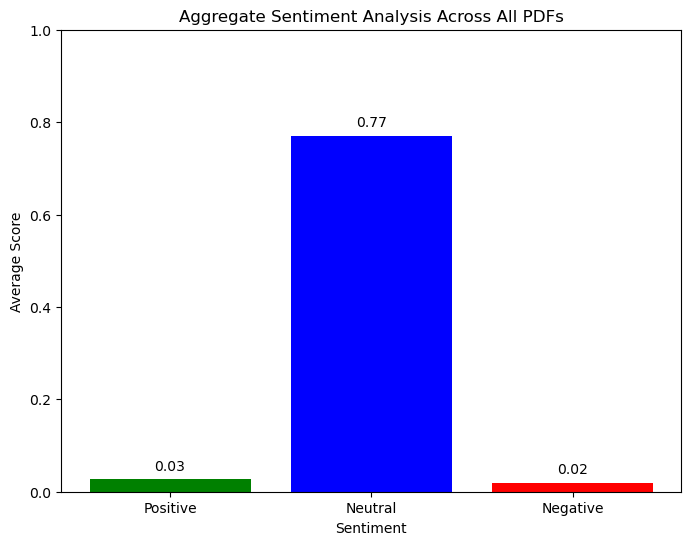

In [61]:
def plot_aggregate_sentiment_analysis(sentiments_by_pdf):

    total_positive, total_neutral, total_negative = 0, 0, 0
    total_sentences = 0

    for pdf_name, sentiments in sentiments_by_pdf.items():

        for sentence, scores in sentiments:

            total_positive += scores['pos']
            total_neutral += scores['neu']
            total_negative += scores['neg']
            total_sentences += 1

    if total_sentences == 0:

        print("No sentiment data to plot.")

        return

    avg_positive = total_positive / total_sentences
    avg_neutral = total_neutral / total_sentences
    avg_negative = total_negative / total_sentences

    plt.figure(figsize=(8, 6))
    categories = ['Positive', 'Neutral', 'Negative']
    scores = [avg_positive, avg_neutral, avg_negative]
    plt.bar(categories, scores, color=['green', 'blue', 'red'])

    plt.xlabel('Sentiment')
    plt.ylabel('Average Score')
    plt.title('Aggregate Sentiment Analysis Across All PDFs')
    plt.ylim(0, 1) 

    for i, score in enumerate(scores):

        plt.text(i, score + 0.02, f'{score:.2f}', ha = 'center')

    plt.show()

plot_aggregate_sentiment_analysis(sentiments_by_pdf)


In [68]:
def collect_positive_negative_sentences(sentiments_by_pdf, positive_threshold=0.05, negative_threshold=-0.05):
    positive_sentences = {}
    negative_sentences = {}

    for pdf_name, sentiments in sentiments_by_pdf.items():
        for sentence, scores in sentiments:
            compound_score = scores['compound']

            if compound_score > positive_threshold:
                positive_sentences.setdefault(pdf_name, []).append(sentence)

            elif compound_score < negative_threshold:
                negative_sentences.setdefault(pdf_name, []).append(sentence)

    return positive_sentences, negative_sentences

positive_sentences, negative_sentences = collect_positive_negative_sentences(sentiments_by_pdf)

# Print positive and negative sentences count per PDF
print("Positive Sentences Count:")
total_positive = 0
for pdf, sentences in positive_sentences.items():
    print(f"PDF: {pdf}, Count: {len(sentences)}")
    total_positive += len(sentences)

print("\nNegative Sentences Count:")
total_negative = 0
for pdf, sentences in negative_sentences.items():
    print(f"PDF: {pdf}, Count: {len(sentences)}")
    total_negative += len(sentences)

print(f"\nTotal Number of Positive Sentences: {total_positive}")
print(f"Total Number of Negative Sentences: {total_negative}")


Positive Sentences Count:
PDF: 0.pdf, Count: 108
PDF: 1.pdf, Count: 134
PDF: 100.pdf, Count: 195
PDF: 1009.pdf, Count: 183
PDF: 101.pdf, Count: 195
PDF: 1010.pdf, Count: 362
PDF: 1011.pdf, Count: 277
PDF: 1014.pdf, Count: 231
PDF: 1018.pdf, Count: 187
PDF: 1026.pdf, Count: 257
PDF: 1028.pdf, Count: 244
PDF: 1031.pdf, Count: 76
PDF: 1045.pdf, Count: 226
PDF: 1057.pdf, Count: 177
PDF: 1058.pdf, Count: 222
PDF: 106.pdf, Count: 76
PDF: 107.pdf, Count: 192
PDF: 108.pdf, Count: 79
PDF: 109.pdf, Count: 143
PDF: 11.pdf, Count: 59
PDF: 111.pdf, Count: 179
PDF: 112.pdf, Count: 137
PDF: 114.pdf, Count: 157
PDF: 115.pdf, Count: 2159
PDF: 117.pdf, Count: 110
PDF: 118.pdf, Count: 110
PDF: 119.pdf, Count: 110
PDF: 12.pdf, Count: 286
PDF: 121.pdf, Count: 854
PDF: 127.pdf, Count: 173
PDF: 129.pdf, Count: 118
PDF: 13.pdf, Count: 196
PDF: 133.pdf, Count: 137
PDF: 137.pdf, Count: 59
PDF: 14.pdf, Count: 70
PDF: 141.pdf, Count: 181
PDF: 143.pdf, Count: 177
PDF: 144.pdf, Count: 136
PDF: 149.pdf, Count: 152
P

In [65]:
def find_extreme_sentiments(sentiments_by_pdf):
    
    most_positive = {'score': -1, 'sentence': '', 'pdf': ''}
    most_negative = {'score': 1, 'sentence': '', 'pdf': ''}

    for pdf_name, sentiments in sentiments_by_pdf.items():

        for sentence, scores in sentiments:

            compound_score = scores['compound']

            if compound_score > most_positive['score']:

                most_positive = {'score': compound_score, 'sentence': sentence, 'pdf': pdf_name}

            if compound_score < most_negative['score']:

                most_negative = {'score': compound_score, 'sentence': sentence, 'pdf': pdf_name}

    return most_positive, most_negative

most_positive, most_negative = find_extreme_sentiments(sentiments_by_pdf)

print("Most Positive Sentence:")
print(f"PDF: {most_positive['pdf']}, Score: {most_positive['score']}, Sentence: {most_positive['sentence']}")

print("\nMost Negative Sentence:")
print(f"PDF: {most_negative['pdf']}, Score: {most_negative['score']}, Sentence: {most_negative['sentence']}")


Most Positive Sentence:
PDF: 152.pdf, Score: 0.9986, Sentence:    Resources, Conservation & Recycling 164 (2021) 105114
13F Improvement of the quality of 
the product reducing the im -
pact of rejections Technical assistance to op -
erate the technology Improvement of the quality of the product that can better reach commercialization Rely on state of the art technology Perception of chemical sub
-
stances as harmful for the en -
vironment Desirable 
G Real-time countermeasures to avoid the production of non- suitable fruits Simple buyer-supplier Improve product quality in order 
to enhance opportunities for com
-
mercialization - Investments in dedicate per -
sonnel Desirable 
H Better preservation of fruits maintaining organoleptic 
characteristics Technical assistance to op
-
erate the technology Improve product quality in order 
to enhance opportunities for com -
mercialization Access to advanced technical expertise Lack of skilled personnel to sup
-
port the implementation of the 


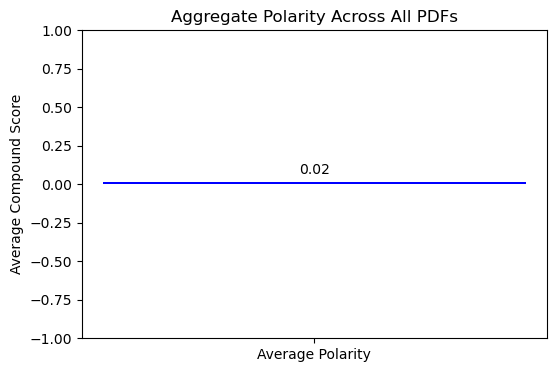

In [66]:
import matplotlib.pyplot as plt

def plot_aggregate_polarity(sentiments_by_pdf):

    total_compound = 0
    total_sentences = 0

    for pdf_name, sentiments in sentiments_by_pdf.items():

        for sentence, scores in sentiments:

            total_compound += scores['compound']
            total_sentences += 1

    if total_sentences == 0:

        print("No sentiment data to plot.")

        return

    avg_compound = total_compound / total_sentences

    plt.figure(figsize=(6, 4))
    plt.bar(['Average Polarity'], [avg_compound], color='blue')

    plt.ylabel('Average Compound Score')
    plt.title('Aggregate Polarity Across All PDFs')
    plt.ylim(-1, 1) 
    plt.text(0, avg_compound + 0.05, f'{avg_compound:.2f}', ha = 'center')
    plt.show()

plot_aggregate_polarity(sentiments_by_pdf)


PDF: 0.pdf, Sentence Count: 1367
PDF: 1.pdf, Sentence Count: 1253
PDF: 1000.pdf, Sentence Count: 54
PDF: 1009.pdf, Sentence Count: 1212
PDF: 1010.pdf, Sentence Count: 1717
PDF: 1011.pdf, Sentence Count: 1776
PDF: 1018.pdf, Sentence Count: 851
PDF: 1026.pdf, Sentence Count: 1096
PDF: 1028.pdf, Sentence Count: 1152
PDF: 1031.pdf, Sentence Count: 777
PDF: 1039.pdf, Sentence Count: 671
PDF: 106.pdf, Sentence Count: 867
PDF: 107.pdf, Sentence Count: 1027
PDF: 108.pdf, Sentence Count: 1479
PDF: 109.pdf, Sentence Count: 1294
PDF: 111.pdf, Sentence Count: 1550
PDF: 112.pdf, Sentence Count: 1134
PDF: 114.pdf, Sentence Count: 1068
PDF: 117.pdf, Sentence Count: 963
PDF: 118.pdf, Sentence Count: 963
PDF: 119.pdf, Sentence Count: 963
PDF: 127.pdf, Sentence Count: 1520
PDF: 129.pdf, Sentence Count: 715
PDF: 133.pdf, Sentence Count: 984
PDF: 137.pdf, Sentence Count: 943
PDF: 138.pdf, Sentence Count: 366
PDF: 139.pdf, Sentence Count: 366
PDF: 14.pdf, Sentence Count: 935
PDF: 141.pdf, Sentence Count: 1

In [67]:
#Average sentence count per pdf  

def print_average_sentence_count(sentences_by_pdf):

    total_sentences = 0

    for pdf_name, sentences in sentences_by_pdf.items():

        total_sentences += len(sentences)

    if total_sentences == 0:

        print("No sentences found.")

        return

    avg_sentence_count = total_sentences / len(sentences_by_pdf)

    print(f"Average Sentence Count: {avg_sentence_count:.2f}")

print_average_sentence_count(sentences_by_pdf)


Average Sentence Count: 2183.02


In [51]:
#Pdfs with sentence counts below 1200

def print_pdf_sentence_counts(sentences_by_pdf):

    below_average_count = 0

    for pdf_name, sentences in sentences_by_pdf.items():

        sentence_count = len(sentences)

        if len(sentences) < 700:

            print(f"PDF: {pdf_name}, Sentence Count: {len(sentences)}")
    
        if sentence_count < 700:

            below_average_count += 1

        print(f"Number of PDFs with sentence counts below 1200: {below_average_count}")

print_pdf_sentence_counts(sentences_by_pdf)







Number of PDFs with sentence counts below 1200: 0
Number of PDFs with sentence counts below 1200: 0
Number of PDFs with sentence counts below 1200: 0
Number of PDFs with sentence counts below 1200: 0
Number of PDFs with sentence counts below 1200: 0
Number of PDFs with sentence counts below 1200: 0
Number of PDFs with sentence counts below 1200: 0
Number of PDFs with sentence counts below 1200: 0
Number of PDFs with sentence counts below 1200: 0
Number of PDFs with sentence counts below 1200: 0
Number of PDFs with sentence counts below 1200: 0
Number of PDFs with sentence counts below 1200: 0
Number of PDFs with sentence counts below 1200: 0
Number of PDFs with sentence counts below 1200: 0
Number of PDFs with sentence counts below 1200: 0
Number of PDFs with sentence counts below 1200: 0
Number of PDFs with sentence counts below 1200: 0
Number of PDFs with sentence counts below 1200: 0
Number of PDFs with sentence counts below 1200: 0
Number of PDFs with sentence counts below 1200: 0


In [49]:
print(len(sentences_by_pdf))

275


In [81]:
def get_compound_scores(sentiments_by_pdf):

    compound_scores_with_pdf = []

    for pdf_name, sentiments in sentiments_by_pdf.items():

        for _, scores in sentiments:

            compound_score = scores['compound']

            compound_scores_with_pdf.append((compound_score, pdf_name))

    return compound_scores_with_pdf

compound_scores_with_pdf = get_compound_scores(sentiments_by_pdf)

for score in compound_scores_with_pdf[:10]:

    print(score)


(0.0, '0.pdf')
(0.0, '0.pdf')
(-0.4215, '0.pdf')
(-0.4215, '0.pdf')
(0.0, '0.pdf')
(-0.4215, '0.pdf')
(0.0, '0.pdf')
(0.3612, '0.pdf')
(-0.4215, '0.pdf')
(0.34, '0.pdf')


{'pdf': '0.pdf', 'score': 0.0}
{'pdf': '1.pdf', 'score': 0.0}
{'pdf': '100.pdf', 'score': -0.4215}
{'pdf': '1009.pdf', 'score': 0.0}
{'pdf': '101.pdf', 'score': -0.4215}
{'pdf': '1010.pdf', 'score': 0.0}
{'pdf': '1011.pdf', 'score': 0.2732}
{'pdf': '1014.pdf', 'score': 0.0}
{'pdf': '1018.pdf', 'score': 0.0}
{'pdf': '1026.pdf', 'score': 0.0}


KeyError: 'scores'